In [1]:
#Importing the requried files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Tarun/OneDrive/Desktop/pppp/Internship_Engineering_graduate_salary - Copy (1).csv")
df

,Gender,10percentage,12percentage,CollegeTier,Degree,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,experince,openess_to_experience,Salary
0,0,87.80,84.00,1,0,73.82,1,2013,650,665,...,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,1,0.2889,445000
1,1,57.00,64.50,2,0,65.00,0,2014,440,435,...,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,1,-0.2859,110000
2,1,77.33,85.17,2,0,61.94,0,2011,485,475,...,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,0,-0.2875,255000
3,1,84.30,86.00,1,0,80.40,1,2013,675,620,...,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,1,0.4805,420000
4,0,82.00,75.00,2,0,64.30,1,2012,575,495,...,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0,75.00,73.00,2,0,70.00,1,2010,505,485,...,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0,0.0284,120000
2994,0,84.00,77.00,2,0,75.20,0,2012,345,585,...,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0,0.5024,120000
2995,1,91.40,65.56,2,0,73.19,0,2011,385,425,...,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0,0.6603,385000
2996,1,88.64,65.16,2,0,74.81,1,2011,465,645,...,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0,0.5419,530000


In [3]:
# df = pd.read_csv("C:/Users/Tarun/OneDrive/Desktop/pppp/Training_Data.csv")

In [4]:
data = df.copy()

In [5]:
data.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'experince', 'openess_to_experience', 'Salary'],
      dtype='object')

# Segregating the data_set

In [7]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].values
print(X.shape)
print(type(X))
X

y = data.iloc[:, -1].values
print(type(y))
y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

(2998, 25)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
RMSE = []

# Linear Regression

In [9]:
#Linear Regression

from sklearn.linear_model import LinearRegression, Lasso


lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lm.predict(X_test)

In [11]:
from sklearn.metrics import mean_absolute_error
LER = int(mean_absolute_error(y_test, y_pred))
RMSE.append(LER)
LER

215624

# Support Vector Regression

In [12]:
#SVR

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [14]:
y_pred = svr.predict(X_test)

In [15]:
LSER = int(mean_absolute_error(y_test, y_pred))
RMSE.append(LSER)
LSER

121477

# Decision Tree

In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [17]:
Dec_reg1 = DecisionTreeRegressor(max_depth=2)
Dec_reg2 = DecisionTreeRegressor(max_depth=5)
Dec_reg1.fit(X_train, y_train)
Dec_reg2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [18]:
y_pred1 = Dec_reg1.predict(X_test)
y_pred2 = Dec_reg2.predict(X_test)

In [19]:
DTER = int(mean_absolute_error(y_test, y_pred))
RMSE.append(DTER)
DTER

121477

# Random Forest 

In [20]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
ram_for = RandomForestRegressor()
ram_for.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
y_pred = ram_for.predict(X_test)

In [22]:
RFER = int(mean_absolute_error(y_test, y_pred))
RMSE.append(RFER)
RFER

110757

In [23]:
RMSE

[215624, 121477, 121477, 110757]

# Comparing all algorithms

In [24]:
ll = [1,2,3,4]

In [25]:
models = ['linear', 'SVR', 'D-Tree', 'Ram_forst']

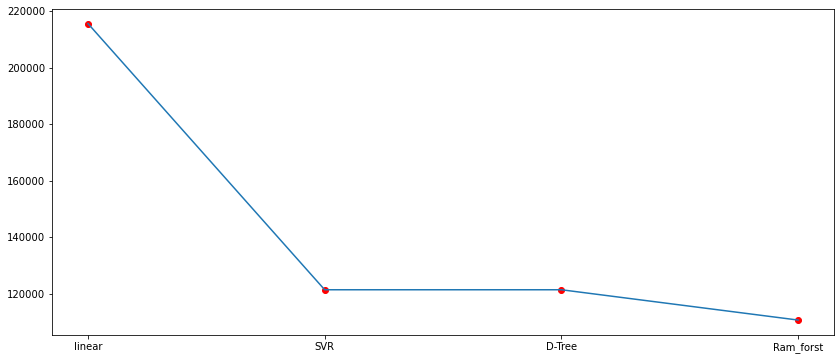

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (14,6))

plt.scatter(models,RMSE, color = 'red')
plt.plot(models, RMSE)

In [27]:
models1 = [121477, 121477, 112059]

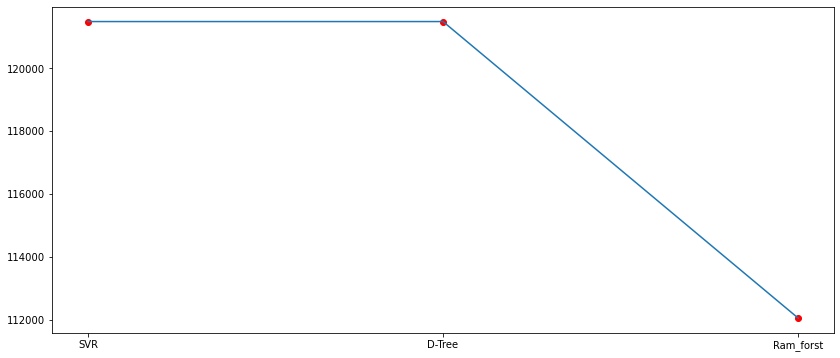

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (14,6))

plt.scatter(['SVR', 'D-Tree', 'Ram_forst'],models1, color = 'red')
plt.plot(['SVR', 'D-Tree', 'Ram_forst'], models1)